# Agenda: Grouping and pivot tables

1. What is grouping?
2. Simple grouping
3. Choosing aggregate functions
4. Group on more than one column
5. Retrieving more than one column
6. Multiple aggregations
7. Grouping on dates and times
8. Grouper
9. Pivot tables

# What is grouping?

If we have a numeric column, we can run an aggregation (e.g., `mean` or `sum` or `count`) on it.  

If we have two columns, one numeric and one categorical, then we can ask to run an aggregation function on all of the columns for a particular value of the categorical column. 

Pandas provides us with an easy to to perform the aggregation function for each subset of the table, once for each value of the categorical.

In [1]:
import pandas as pd


In [2]:
filename = 'taxi.csv'

df = pd.read_csv(filename)

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [6]:
# what was the mean distance that taxis traveled with 1 passenger?

(
    df
    .loc[lambda df_: df_['passenger_count'] == 1,    # row selector
         'trip_distance']   # column selector
    .mean()
)

np.float64(3.0923380047176354)

In [8]:
# what was the mean distance that taxis traveled with 2 passengers?

(
    df
    .loc[lambda df_: df_['passenger_count'] == 2,    # row selector
         'trip_distance']   # column selector
    .mean()
)

np.float64(3.3843869002284848)

In [9]:
# what about 3 passengers?

(
    df
    .loc[lambda df_: df_['passenger_count'] == 3,    # row selector
         'trip_distance']   # column selector
    .mean()
)

np.float64(3.3423891625615765)

In [11]:
# Let's find out the mean trip_distance for every distinct value of passenger_count



# Grouping

- We use the `groupby` method
- Inside of the parentheses, we pass the name of the categorical column we want to group on
- After the parentheses, we have square brackets with the name of the numeric column we want to calculate on
- After that, we invoke the aggregation method we want

In [12]:
#            categorical        numeric          aggregation function
df.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0    4.600000
1    3.092338
2    3.384387
3    3.342389
4    3.628901
5    3.182712
6    3.170976
Name: trip_distance, dtype: float64

In [15]:
# can I put a numeric column instead of the categorical?
# yes, but you probably don't want to 

# here, we'll ask for the mean trip_distance for every 
# distinct amount that people paid for their taxi
df.groupby('total_amount')['trip_distance'].mean()  

total_amount
-7.80       0.89
-7.30       0.93
-3.30       0.00
 0.30       0.50
 2.30       0.00
           ...  
 162.39    32.10
 194.30    29.30
 210.14    37.20
 250.30     0.00
 252.35    31.90
Name: trip_distance, Length: 916, dtype: float64

# Aggregation methods

- `count`  (returns an integer, the number of non-`NA`/`NaN` values 
- `sum`
- `mean`
- `std`
- `min`
- `max`
- `median`
- `quantile`
- `idxmin`  (returns the index of the lowest value)
- `idxmax`  (returns the index of the highest value)


In [18]:
df['passenger_count'].value_counts()

passenger_count
1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: count, dtype: int64

# When would we use this?

- Find mean sales per region
- Find max sales per salespeople (find the best salesperson!)
- Find std in temperature
- Find the class average for each class in a school

# Exercise: Taxi grouping

You can get this file from GitHub, or you can get it as part of the zipfile here: https://files.lerner.co.il/data-science-exercise-files.zip

1. Find the mean `total_amount` for each value of `passenger_count`. Should a driver prefer to pick up more people? Does it make a big difference?
2. Calculate the percentage tip, using `tip_amount` and `total_amount`. Do you see a difference in the mean tip percentage between vendors of different taxi computers? (Check VendorID)
3. Count how many trips there were for each payment type.

In [19]:

df['payment_type']

0       2
1       1
2       1
3       1
4       2
       ..
9994    2
9995    1
9996    2
9997    2
9998    1
Name: payment_type, Length: 9999, dtype: int64

In [22]:
df.groupby('passenger_count')['passenger_count'].count()

passenger_count
0       2
1    7207
2    1313
3     406
4     182
5     520
6     369
Name: passenger_count, dtype: int64

In [23]:
# 1. Find the mean `total_amount` for each value of `passenger_count`. Should a driver prefer to pick up more people? Does it make a big difference?

df.groupby('passenger_count')['total_amount'].mean()

passenger_count
0    25.570000
1    17.368569
2    18.406306
3    17.994704
4    18.881648
5    17.211269
6    17.401355
Name: total_amount, dtype: float64

In [25]:
# 2. Calculate the percentage tip, using `tip_amount` and `total_amount`. Do you see a difference in the mean 
# tip percentage between vendors of different taxi computers? (Check VendorID)

(
    df
    .assign(tip_percentage = lambda df_: df_['tip_amount'] / df_['total_amount'])
    .groupby('passenger_count')['tip_percentage'].mean()
)


passenger_count
0    0.183127
1    0.092880
2    0.088309
3    0.087368
4    0.077067
5    0.094349
6    0.086075
Name: tip_percentage, dtype: float64

In [27]:
# let's remove all non-tippers, and see how much, on average, people tip
# if they tip at all

(
    df
    .loc[lambda df_: df_['tip_amount'] > 0]   # keep only the rows where there was a tip
    .assign(tip_percentage = lambda df_: df_['tip_amount'] / df_['total_amount'])
    .groupby('passenger_count')['tip_percentage'].mean()
)


passenger_count
0    0.183127
1    0.159227
2    0.160374
3    0.161970
4    0.168990
5    0.162455
6    0.162049
Name: tip_percentage, dtype: float64

In [29]:
(
    df
    .loc[lambda df_: df_['tip_amount'] > 0]   # keep only the rows where there was a tip
    .assign(tip_percentage = lambda df_: df_['tip_amount'] / df_['total_amount'])
    .groupby('VendorID')['tip_percentage'].mean()
)

VendorID
1    0.158171
2    0.161535
Name: tip_percentage, dtype: float64

In [30]:
# 3. Count how many trips there were for each payment type.

df.groupby('payment_type')['total_amount'].count()

payment_type
1    5968
2    3991
3      34
4       6
Name: total_amount, dtype: int64

# How can our groupings get more complex?

We'll start by calculating on more than one column. We can do this by putting a list of strings in the 
square brackets, rather than a single string.

In [31]:
df.groupby('payment_type')[['total_amount', 'trip_distance']].mean()

,total_amount,trip_distance
payment_type,,
1,19.968432,3.438175
2,13.975392,2.745352
3,14.708235,2.765588
4,9.950000,2.031667


We can also get more complex by having more than one categorical column.  Here, the combination of columns
will serve as our index. We'll get one result for each combination.  The resulting series will contain
a multi-index in which the columns appear in the order specified.

In [32]:
df.groupby(['payment_type', 'VendorID'])['total_amount'].mean()

payment_type  VendorID
1             1           19.902497
              2           20.029719
2             1           13.500875
              2           14.415754
3             1           15.958750
              2           -5.300000
4             1           13.500000
              2           -7.800000
Name: total_amount, dtype: float64

# Exercise: Olympic grouping

1. Use the `Olympic` file in the same directory as Jupyter, and turn it into a Pandas data frame.
2. Find the mean height of athletes per `Team`.
3. Find the mean height and weight of athletes per `Team`.
4. Find the mean height of athletes per combination of `Team` and `Year`.


In [33]:
filename = 'olympic_athlete_events.zip'

df = pd.read_csv(filename)

In [34]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [39]:
# mean height of athletes per team

(
    df
    .loc[lambda df_: df_['Year'] > 1980]
    .groupby('Team')['Height'].mean()
    .head(20)
)

Team
Afghanistan            173.588235
Albania                173.000000
Algeria                174.719212
American Samoa         175.666667
Andorra                173.566929
Angola                 178.688596
Antigua and Barbuda    174.633663
Argentina              177.420723
Argentina-1            185.125000
Argentina-2            186.125000
Armenia                171.937799
Aruba                  173.219512
Australia              177.187867
Australia-1            178.820513
Australia-2            177.500000
Australia-3            178.500000
Austria                178.038897
Austria-1              184.136364
Austria-2              186.571429
Azerbaijan             172.717391
Name: Height, dtype: float64

In [41]:
# 3. Find the mean height and weight of athletes per `Team`.

(
    df
    .loc[lambda df_: df_['Year'] > 1980]
    .groupby('Team')[['Height', 'Weight']].mean()
)

,Height,Weight
Team,,
Afghanistan,173.588235,64.529412
Albania,173.000000,71.700000
Algeria,174.719212,68.928747
American Samoa,175.666667,87.958333
Andorra,173.566929,69.897638
...,...,...
Yugoslavia,181.097308,76.101449
Yugoslavia-1,185.666667,88.000000
Yugoslavia-2,183.200000,90.200000


In [42]:
# 4. Find the mean height of athletes per combination of `Team` and `Year`.

(
    df
    .loc[lambda df_: df_['Year'] > 1980]
    .groupby(['Team', 'Year'])['Height'].mean()
)

Team         Year
Afghanistan  1988           NaN
             1996           NaN
             2004    170.750000
             2008    179.250000
             2012    171.666667
                        ...    
Zimbabwe     2004    177.785714
             2008    171.928571
             2012    174.444444
             2014    182.000000
             2016    167.838710
Name: Height, Length: 2833, dtype: float64

In [43]:
(
    df
    .loc[lambda df_: df_['Year'] > 1980]
    .groupby(['Sex', 'Year'])['Height'].mean()
)

Sex  Year
F    1984    167.142020
     1988    167.605086
     1992    168.297337
     1994    167.037109
     1996    168.337929
     1998    166.605322
     2000    168.972903
     2002    166.646006
     2004    168.979949
     2006    166.838930
     2008    169.500433
     2010    167.295615
     2012    169.732233
     2014    167.112048
     2016    169.445906
M    1984    178.552973
     1988    179.100185
     1992    179.746596
     1994    179.442791
     1996    180.133290
     1998    179.559041
     2000    180.704091
     2002    179.715706
     2004    180.891246
     2006    179.845361
     2008    181.253646
     2010    180.432824
     2012    181.633557
     2014    180.261738
     2016    181.547852
Name: Height, dtype: float64

In [47]:
df.groupby('Team')[['Height', 'Weight']].mean()

,Height,Weight
Team,,
30. Februar,171.500000,70.000000
A North American Team,NaN,NaN
Acipactli,174.666667,75.333333
Acturus,NaN,NaN
Afghanistan,170.592593,65.901639
...,...,...
Zambia,172.828125,66.035971
Zefyros,180.000000,72.500000
Zimbabwe,173.325175,68.055749


In [48]:
# We've seen more than one categorical.
# We've seen more than one numeric.
# Let's try them both, together!

(
    df
    .groupby(['Team', 'Year'])[['Height', 'Weight']].mean()
)

Height     Weight
Team                  Year                       
30. Februar           1952  171.500000  70.000000
A North American Team 1900         NaN        NaN
Acipactli             1964  174.666667  75.333333
Acturus               1948         NaN        NaN
Afghanistan           1936         NaN        NaN
...                                ...        ...
Zimbabwe              2012  174.444444  65.222222
                      2014  182.000000  81.000000
                      2016  167.838710  62.193548
Zut                   1908         NaN        NaN
rn-2                  1912  176.000000  82.000000

[5170 rows x 2 columns]

# What if we want more than one aggregation method?

We can use the `agg` method instead of `mean` or one another method.

We then pass to `agg` a list of strings, each being the name of an aggregation method we want to run.

In [50]:
(
    df
    .groupby('Team')['Height'].agg(['mean', 'std'])
)

,mean,std
Team,,
30. Februar,171.500000,6.363961
A North American Team,NaN,NaN
Acipactli,174.666667,4.725816
Acturus,NaN,NaN
Afghanistan,170.592593,7.778826
...,...,...
Zambia,172.828125,8.260626
Zefyros,180.000000,2.828427
Zimbabwe,173.325175,10.400870


# Next up

1. Grouping with dates and times
2. Grouper
3. Pivot tables

Resume at :45

In [51]:
(
    df
    .groupby(['Team', 'Year'])    # multiple categorical columns
    [['Height', 'Weight']]        # multiple numeric columns
    .agg(['mean', 'count'])       # multiple methods
) 

Height           Weight      
                                  mean count       mean count
Team                  Year                                   
30. Februar           1952  171.500000     2  70.000000     1
A North American Team 1900         NaN     0        NaN     0
Acipactli             1964  174.666667     3  75.333333     3
Acturus               1948         NaN     0        NaN     0
Afghanistan           1936         NaN     0        NaN     0
...                                ...   ...        ...   ...
Zimbabwe              2012  174.444444     9  65.222222     9
                      2014  182.000000     2  81.000000     2
                      2016  167.838710    31  62.193548    31
Zut                   1908         NaN     0        NaN     0
rn-2                  1912  176.000000     1  82.000000     1

[5170 rows x 4 columns]

# Dates and times

We can group on date and time data, using it as categoricals.  It might not be obvious, but we can use
the `.dt` accessor and then one of the time components, and that effectively gives us a categorical column back.

In [52]:
df = pd.read_csv('taxi.csv',
                 parse_dates=['tpep_pickup_datetime',
                              'tpep_dropoff_datetime'])

In [53]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [59]:
# we can pull out datetime information with .dt

df['tpep_pickup_datetime'].dt.day_name()

0       Tuesday
1       Tuesday
2       Tuesday
3       Tuesday
4       Tuesday
         ...   
9994     Monday
9995     Monday
9996     Monday
9997     Monday
9998     Monday
Name: tpep_pickup_datetime, Length: 9999, dtype: object

In [60]:
# I want to know on which day of the week we see the greatest number of taxi rides

df.groupby(df['tpep_pickup_datetime'].dt.day_name())['passenger_count'].count()

tpep_pickup_datetime
Monday      2439
Saturday     628
Thursday    2536
Tuesday     4396
Name: passenger_count, dtype: int64

In [61]:
# did people go farther on weekdays or weekends?

df.groupby(df['tpep_pickup_datetime'].dt.day_name())['trip_distance'].mean()

tpep_pickup_datetime
Monday      4.312809
Saturday    2.852166
Thursday    2.986285
Tuesday     2.661199
Name: trip_distance, dtype: float64

In [62]:
df.groupby(df['tpep_pickup_datetime'].dt.hour)['trip_distance'].mean()

tpep_pickup_datetime
0     4.312809
11    2.661199
15    2.986285
16    2.852166
Name: trip_distance, dtype: float64

# Exercise: Grouping on datetimes

1. Load up the July 2020 taxi data. (In GitHub, also in the data for Pandas Workout at https://files.lerner.co.il/pandas-workout-data.zip .)
2. Find, for each hour of the day, what were the mean `trip_distance` and `total_amount`?
3. Find, for each day of the week, the mean tip percentage.
4. Find ,for each combination of year and month, how many rides are in the database. Does it makes sense that this file is from July, 2020?

In [69]:
df = pd.read_csv('nyc_taxi_2020-07.csv', low_memory=False,
                parse_dates=['tpep_pickup_datetime',
                             'tpep_dropoff_datetime'])

In [70]:
df.shape

(800412, 18)

In [71]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [72]:
# 2. Find, for each hour of the day, what were the mean `trip_distance` and `total_amount`?

df.groupby(df['tpep_pickup_datetime'].dt.hour)[['trip_distance', 'total_amount']].mean()

,trip_distance,total_amount
tpep_pickup_datetime,,
0,4.686456,22.917394
1,15.018075,34.705371
2,7.522501,35.915245
3,14.842060,43.770862
4,13.844186,45.348270
5,3.669135,19.403755
6,2.877530,16.262188
7,4.502182,17.038826
8,2.588864,16.428913


<Axes: xlabel='tpep_pickup_datetime'>

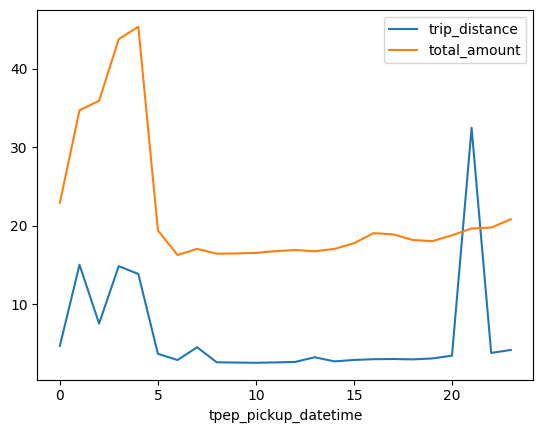

In [73]:
df.groupby(df['tpep_pickup_datetime'].dt.hour)[['trip_distance', 'total_amount']].mean().plot.line()

In [78]:
# 3. Find, for each day of the week, the mean tip percentage.

(
    df
    .assign(tip_percentage = lambda df_: df_['tip_amount'] / df_['total_amount'])
    .groupby(df['tpep_pickup_datetime'].dt.day_name())[['trip_distance', 'total_amount']].mean()
)

,trip_distance,total_amount
tpep_pickup_datetime,,
Friday,3.687451,18.861981
Monday,3.087188,18.407052
Saturday,6.632864,18.682561
Sunday,7.252421,19.871919
Thursday,5.285671,18.497654
Tuesday,2.943605,18.169097
Wednesday,3.255378,18.496348


In [80]:
# 4. Find ,for each combination of year and month, how many rides are in the database. 
# Does it makes sense that this file is from July, 2020?

df.groupby([df['tpep_pickup_datetime'].dt.year, df['tpep_pickup_datetime'].dt.month])['VendorID'].count()

tpep_pickup_datetime  tpep_pickup_datetime
2008                  12                           1
2009                  1                            1
2020                  6                            6
                      7                       737555
                      8                            2
Name: VendorID, dtype: int64

In [83]:
# another way to do the grouping, instead of .dt.something is to use the Grouper object

df.groupby(pd.Grouper(key='passenger_count'))['VendorID'].count()

passenger_count
1.0    566009
2.0     90900
3.0     21778
4.0      7810
6.0     14447
0.0     19506
5.0     17107
8.0         2
7.0         5
9.0         1
Name: VendorID, dtype: int64

<Axes: xlabel='tpep_pickup_datetime'>

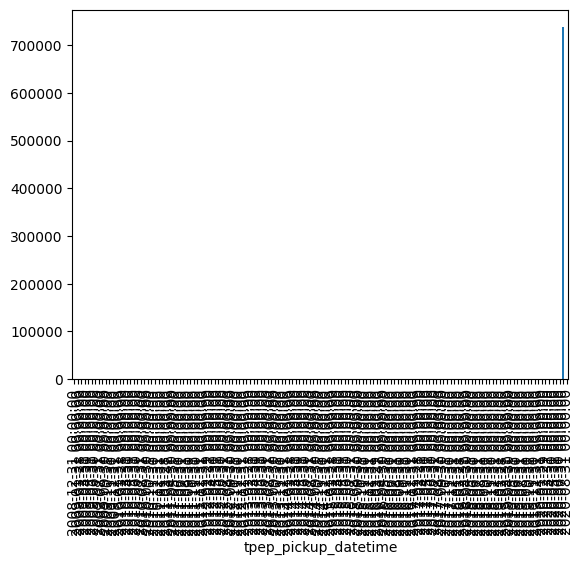

In [87]:
# let's find out how many times there were trips
# for each 1-day segment of the values in pickup_datetime

df.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='1ME'))['VendorID'].count().plot.bar()

In [81]:
help(pd.Grouper)

Help on class Grouper in module pandas.core.groupby.grouper:

class Grouper(builtins.object)
 |  Grouper(*args, **kwargs)
 |
 |  A Grouper allows the user to specify a groupby instruction for an object.
 |
 |  This specification will select a column via the key parameter, or if the
 |  level and/or axis parameters are given, a level of the index of the target
 |  object.
 |
 |  If `axis` and/or `level` are passed as keywords to both `Grouper` and
 |  `groupby`, the values passed to `Grouper` take precedence.
 |
 |  Parameters
 |  ----------
 |  key : str, defaults to None
 |      Groupby key, which selects the grouping column of the target.
 |  level : name/number, defaults to None
 |      The level for the target index.
 |  freq : str / frequency object, defaults to None
 |      This will groupby the specified frequency if the target selection
 |      (via key or level) is a datetime-like object. For full specification
 |      of available frequencies, please see `here
 |      <https:

# Pivot tables

Pivot tables are a 2D groupby.   Pivot tables allow us to:

- Choose a categorical column, whose unique values will be the *column* names
- Choose a categorical column, whose unique values will be the *row* names/index
- Choose a values column, whose values will be used to fill the row-column pairs
- Optionally, choose an aggregation method if you don't want `mean`

In [88]:
# let's create a pivot table in which we'll compare VendorID and passenger_count, 
# looking at mean values for both

df.pivot_table(columns='VendorID',
              index='passenger_count',
              values='trip_distance',
              aggfunc='mean')

VendorID,1.0,2.0
passenger_count,,
0.0,2.633674,1.124423
1.0,2.399510,2.832988
2.0,2.999582,2.875436
3.0,3.263895,2.833936
4.0,3.990870,2.865008
5.0,2.998795,2.778039
6.0,3.311842,2.816152
7.0,NaN,2.168000
8.0,NaN,0.000000


In [89]:
# we can now use pivot_table on one or more columns per call

df.pivot_table(columns='VendorID',
              index='passenger_count',
              values=['trip_distance', 'total_amount'],
              aggfunc='mean')

total_amount            trip_distance          
VendorID                 1.0        2.0           1.0       2.0
passenger_count                                                
0.0                16.512779  26.315769      2.633674  1.124423
1.0                17.016706  16.751919      2.399510  2.832988
2.0                17.578967  17.008045      2.999582  2.875436
3.0                18.101279  16.813775      3.263895  2.833936
4.0                20.140810  17.585004      3.990870  2.865008
5.0                17.362831  16.719594      2.998795  2.778039
6.0                18.659649  16.783298      3.311842  2.816152
7.0                      NaN  22.456000           NaN  2.168000
8.0                      NaN  10.300000           NaN  0.000000
9.0                      NaN  11.760000           NaN  0.000000

In [90]:
df.pivot_table(columns='VendorID',
              index='passenger_count',
              values=['trip_distance', 'total_amount'],
              aggfunc=['mean', 'std'])

mean                                             std  \
                total_amount            trip_distance           total_amount   
VendorID                 1.0        2.0           1.0       2.0          1.0   
passenger_count                                                                
0.0                16.512779  26.315769      2.633674  1.124423    13.383524   
1.0                17.016706  16.751919      2.399510  2.832988    12.601732   
2.0                17.578967  17.008045      2.999582  2.875436    13.170921   
3.0                18.101279  16.813775      3.263895  2.833936    12.718772   
4.0                20.140810  17.585004      3.990870  2.865008    15.722200   
5.0                17.362831  16.719594      2.998795  2.778039    13.497523   
6.0                18.659649  16.783298      3.311842  2.816152    53.380364   
7.0                      NaN  22.456000           NaN  2.168000          NaN   
8.0                      NaN  10.300000           NaN  0.000000          NaN   
9.0                      NaN  11.760000           NaN  0.000000          NaN   

                                                    
                           trip_distance            
VendorID               2.0           1.0       2.0  
passenger_count                                     
0.0              23.583405      3.726734  3.287266  
1.0              13.423900      3.254965  3.589528  
2.0              13.135515      3.691625  3.536161  
3.0              12.803579      3.837697  3.471377  
4.0              22.430963      4.788418  3.613319  
5.0              11.667040      3.971016  3.319884  
6.0              11.827297     11.328168  3.360938  
7.0              28.234990           NaN  4.847795  
8.0               2.828427           NaN  0.000000  
9.0                    NaN           NaN       NaN

# Exercise: Olympic data

1. Load the data into a data frame. Keep only the teams from the G7. (US, UK, Canada, Germany, France, Japan, Italy)
2. Create a pivot table showing the mean height and weight of each athlete from the G7.
3. Create a pivot table showing the number of male/female athletes from each G7 country.